This notebook maps each business to its correponding census tracts and neighborhoods. It also maps census tracts to neighborhoods so that neighborhoods can use the census data, too.

## Definition

- **Census Tracts**: a relatively homogeneous geographical unit with respect to population characteristics, as delineated by the Census Bureau. Census data are only available at this level.
- **Neighborhoods**: cities, sometimes even different agencies within a city, have different methods for neighborhood delineation. Yelp has a neighborhood name designated to some businesses, but only a small fraction of the whole dataset. Zillow has composed a [dataset](https://www.zillow.com/howto/api/neighborhood-boundaries.htm) of neighborhood boundaries for all the largest U.S. cities. We use this dataset to map census tracts to neighborhood, then aggregate census variables to this level.

## Dependencies

This notebook requires following packages: [geopandas](http://geopandas.org/install.html), [rtree](http://toblerity.org/rtree/index.html).

You may need to run following commands in order to successfully install the dependencies:

```bash
brew install spatialindex 
pip install rtree
```

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load neighborhood boundaries

In [2]:
nbh = gpd.read_file('../../data/zillow-neighborhoods/ZillowNeighborhoods-NV/ZillowNeighborhoods-NV.shp')
nbh.head()

,State,County,City,Name,RegionID,geometry
0,NV,Clark,Henderson,Foothills,273747,POLYGON ((-114.9221652119999 36.08516997600095...
1,NV,Clark,Henderson,Lake Las Vegas,274231,"POLYGON ((-114.9141709999998 36.1237530000005,..."
2,NV,Clark,Henderson,River Mountain,275187,POLYGON ((-114.9127029999998 36.02715600000074...
3,NV,Clark,Henderson,Anthem,272773,POLYGON ((-115.0842279750258 35.98410669400149...
4,NV,Clark,Henderson,Gibson Springs,273820,POLYGON ((-115.0275398849999 36.05637023400007...


In [3]:
import os

def read_shapefiles(folder):
    """Read all shape files under a folder and merge them"""
    return gpd.GeoDataFrame(pd.concat([
        gpd.read_file(f"{folder}/{path}")
        for path in os.listdir(folder)
        if os.path.isdir(f"{folder}/{path}")
    ]))

nbh = read_shapefiles('../../data/zillow-neighborhoods')

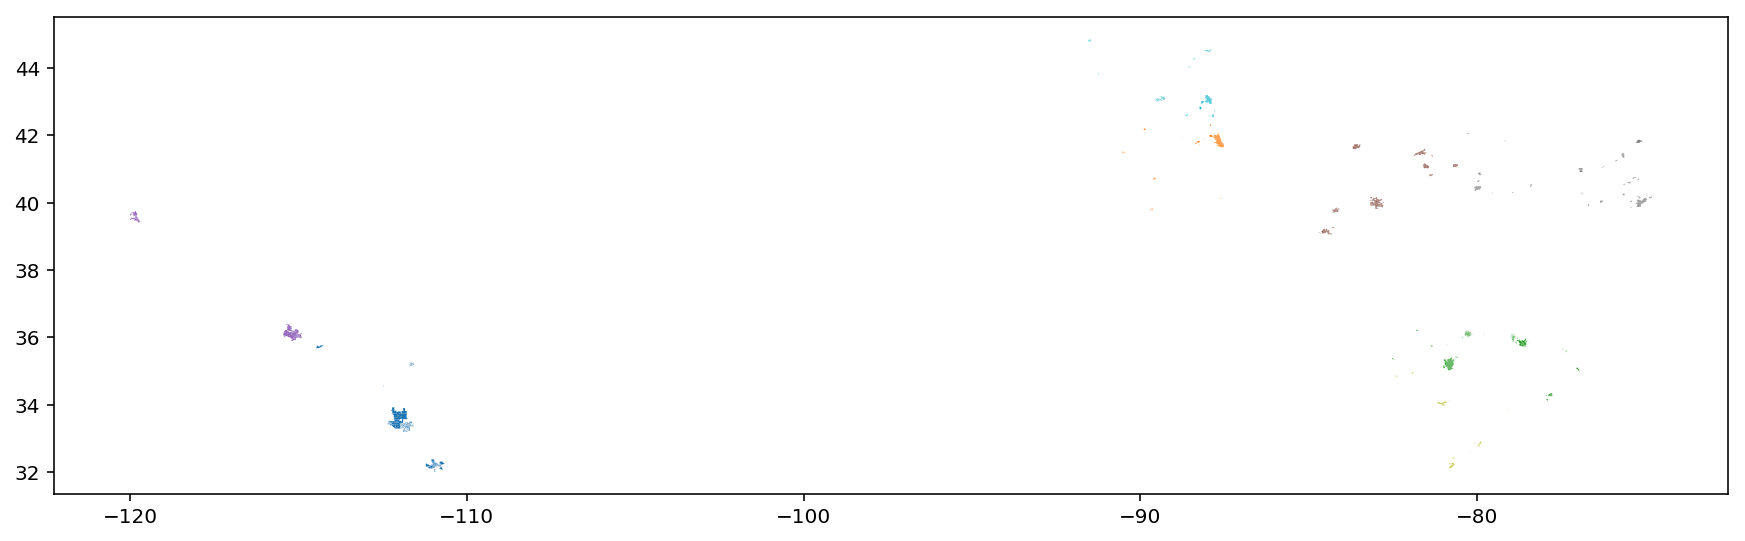

In [9]:
fig, ax = plt.subplots(figsize=(15,15), subplot_kw={'aspect':'equal'})
nbh.plot(column='State', ax=ax)

In [12]:
nbh['Neighborhood'] = nbh['Name'] + ', ' + nbh['City'] + ', ' + nbh['State']
nbh['nbh_area'] = nbh.area

In [13]:
nbh.groupbyby('Neighborhood').agg({'nbh_area': ['sum']})

,nbh_area
,sum
Neighborhood,
"1st Ward, Allentown, PA",0.000131
"6th Ward, Allentown, PA",0.000109
"8th Ward, Allentown, PA",0.000074
"A Mountain, Tucson, AZ",0.000217
"Abby Trails, Columbus, OH",0.000320
"Abercromby, Durham, NC",0.000009
"Academy Gardens, Philadelphia, PA",0.000148
"Academy Historic District, Statesville, NC",0.000010


In [14]:
businesses

,State,County,City,Name,RegionID,geometry,Neighborhood,nbh_area
0,AZ,Maricopa,Gilbert,Highland,256336,POLYGON ((-111.7123999999999 33.29793137600003...,"Highland, Gilbert, AZ",0.000008
1,AZ,Maricopa,Gilbert,College Park,273316,"POLYGON ((-111.783694615 33.35004000000012, -1...","College Park, Gilbert, AZ",0.000008
2,AZ,Maricopa,Gilbert,Summerfield,275606,POLYGON ((-111.7729562749999 33.34693377400015...,"Summerfield, Gilbert, AZ",0.000016
3,AZ,Maricopa,Gilbert,North Shore,412298,POLYGON ((-111.8156916899999 33.34980000000016...,"North Shore, Gilbert, AZ",0.000054
4,AZ,Maricopa,Gilbert,Cooper Ranch,417530,POLYGON ((-111.8093578879999 33.37339378300001...,"Cooper Ranch, Gilbert, AZ",0.000034
5,AZ,Maricopa,Gilbert,Gateway Court,417537,POLYGON ((-111.7901526309999 33.37368412200014...,"Gateway Court, Gilbert, AZ",0.000004
6,AZ,Maricopa,Gilbert,Circle G Meadows,417539,POLYGON ((-111.7782519029994 33.37879278309092...,"Circle G Meadows, Gilbert, AZ",0.000046
7,AZ,Maricopa,Gilbert,Tone,417546,POLYGON ((-111.7268629999999 33.37932200000015...,"Tone, Gilbert, AZ",0.000024
8,AZ,Maricopa,Gilbert,The Gardens,417548,POLYGON ((-111.6955831139999 33.32539839400017...,"The Gardens, Gilbert, AZ",0.000062
9,AZ,Maricopa,Gilbert,Lindsay Estates,417553,POLYGON ((-111.7685774109999 33.31387165400017...,"Lindsay Estates, Gilbert, AZ",0.000031


In [ ]:
cities = nbh.dissolve(by='City')
cities.plot(cmap='YlOrRd');

In [ ]:
# State Abbr to FIPS_ID
# AZ NV NC PA OH WI IL SC
# 04 32 37 42 39 55 17 45

tract = gpd.read_file('../../data/census-tracts/cb_2016_32_tract_500k/')
tract.head()

In [ ]:
itc = gpd.overlay(nbh, tract, how='intersection')

In [ ]:
itc.head()

In [ ]:
itc.head()

In [ ]:
nbhoods = itc.dissolve(by='Neighborhood')

In [ ]:
nbhoods[nbhoods['City'] == 'Las Vegas'].plot(cmap='Blues')

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), subplot_kw={'aspect':'equal'})
itc[itc['City'] == 'Las Vegas'].plot(
    column='Neighborhood', cmap='Blues', ax=ax,
)
plt.title('Neighborhoods and Census Tracts in Las Vegas')
plt.show()

In [ ]:
import pandas as pd

itc['area'] = itc.area
tmp = itc.groupby(['Neighborhood', 'GEOID']).agg({ 'area': ['sum'] })
tmp = pd.DataFrame(tmp.to_records())
tmp.columns = ('neighborhood', 'ct_id', 'area')

tract['area'] = tract.area
tmp2 = tract.groupby('GEOID').agg({ 'area': ['sum'] })
tmp2 = pd.DataFrame(tmp2.to_records())
tmp2.columns = ('ct_id', 'ct_area_total')

merged = pd.merge(tmp, tmp2)
merged['ct_area_ratio'] = merged['area'] / merged['ct_area_total']
merged = merged.sort_values(['ct_id', 'ct_area_ratio'], ascending=[True, False])
merged

In [ ]:
merged.groupby(['neighborhood','ct_id']).agg({
    'ct_area_ratio': 'first'
})

In [ ]:
itc['area']